In [2]:
%matplotlib inline
import numpy as np
import sys, scipy, os, IPython.display
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile

sys.path.append('../src')
import laplacian
import RecurrenceMatrix as RM

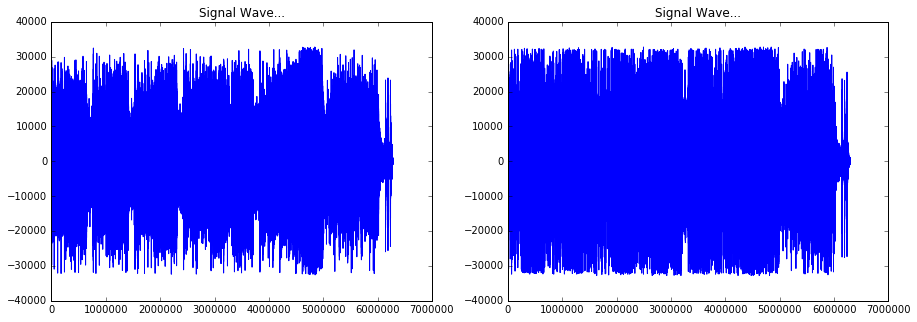

In [3]:
#import file
rate, signal = wavfile.read('../data/TheBeatles-ComeTogether.wav')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Signal Wave...')
plt.plot(signal[:,0])

plt.subplot(1, 2, 2)
plt.title('Signal Wave...')
plt.plot(signal[:,1])
plt.show()

# Construct R and delta from mfcc

In [4]:
#kmeans for finding similar features among different time frame
from sklearn.cluster import MiniBatchKMeans
y = signal[:,0]
mfcc = np.transpose(librosa.feature.mfcc(y=y, n_mfcc=20, sr = rate))
print mfcc.shape
n, dim = mfcc.shape
clf = MiniBatchKMeans(n_clusters=100, batch_size=int(n*0.1), max_iter=200, max_no_improvement=None).fit(mfcc)
#construct recurrence matrix R
R = RM.construct(clf.labels_)
#construct delta matrix R
delta = RM.adjacentMatrix(R.shape[0])

print delta[:10,:10]
print "R is symmetric: ", (R == np.transpose(R)).all(), R.shape #check is symmetric
print "delta is symmetric: ", (delta == np.transpose(delta)).all(), delta.shape #check is symmetric

(12288, 20)
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
R is symmetric:  True (12288, 12288)
delta is symmetric:  True (12288, 12288)


In [5]:
miu = RM.getBalancedMiu(R, delta)
R_gau = RM.gaussianKernel(R)
print miu, R_gau.shape



0.988592836828 (12288, 12288)


(1000, 1000)
(1000, 10)


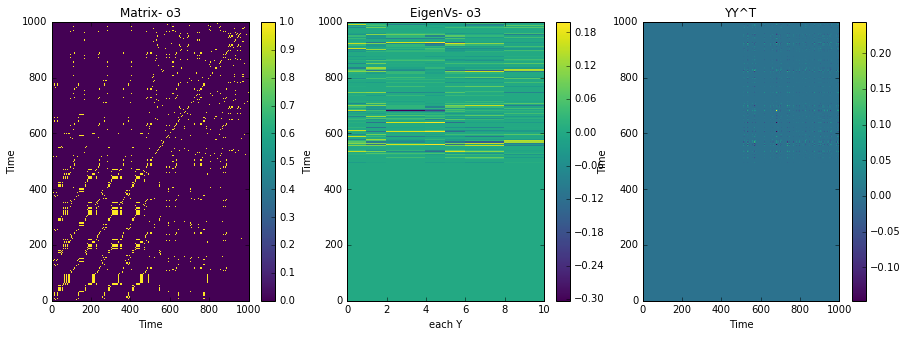

In [17]:
#plot subMatrix of mfcc result
o3 = R[:1000,:1000]
print o3.shape

Y3 = laplacian.getNormLaplacian(o3, 10) #similarity matrix, top m eigenvectors
YY = np.dot(Y3[:,:], np.transpose(Y3)[:,:])
print Y3.shape

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pcolor(o3, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o3')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 3, 2)
plt.pcolor(Y3, cmap="viridis")
plt.colorbar()
plt.title('EigenVs- o3')
plt.xlabel('each Y')
plt.ylabel('Time')

plt.subplot(1, 3, 3)
plt.pcolor(YY, cmap="viridis")
plt.colorbar()
plt.title('YY^T')
plt.ylabel('Time')
plt.xlabel('Time')
plt.show()

# Construct R from cqt

In [19]:
y = signal[:,0]
cqt = np.transpose(librosa.cqt(y))
print cqt.shape
n, dim = mfcc.shape
clf = MiniBatchKMeans(n_clusters=100, batch_size=int(n*0.1), max_iter=200, max_no_improvement=None).fit(cqt)
#construct recurrence matrix R
R = RM.construct(clf.labels_)
print (R == np.transpose(R)).all(), R.shape #check is symmetric

(12288, 84)
True (12288, 12288)


(1000, 1000)
(1000, 10)


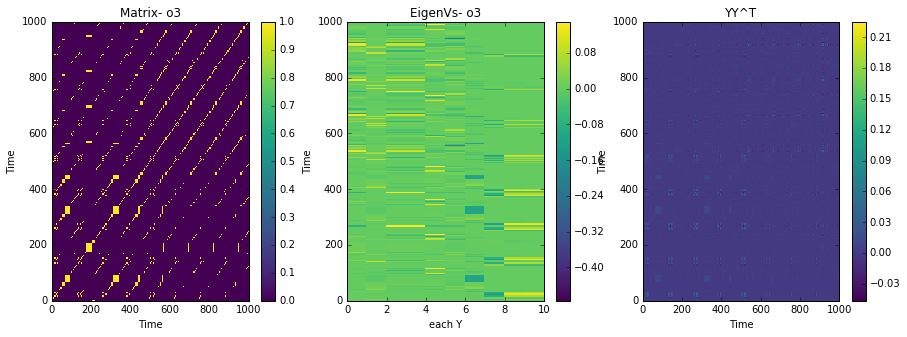

In [20]:
#plot subMatrix of cqt result
o3 = R[:1000,:1000]
print o3.shape

Y3 = laplacian.getNormLaplacian(o3, 10) #similarity matrix, top m eigenvectors
YY = np.dot(Y3[:,:], np.transpose(Y3)[:,:])
print Y3.shape

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pcolor(o3, cmap="viridis")
plt.colorbar()
plt.title('Matrix- o3')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 3, 2)
plt.pcolor(Y3, cmap="viridis")
plt.colorbar()
plt.title('EigenVs- o3')
plt.xlabel('each Y')
plt.ylabel('Time')

plt.subplot(1, 3, 3)
plt.pcolor(YY, cmap="viridis")
plt.colorbar()
plt.title('YY^T')
plt.ylabel('Time')
plt.xlabel('Time')
plt.show()

True
True
